# BOUKHDOUD ALAA

# Monte Carlo Mini-project 

## Estimating of π through the computation of the area of a circle 

The main objective in this part is estimating π value using the area of a circle.

Firstly I need to say that monte carlo method is totally based on random numbers and probability to compute something that is not random.
In this case we know that the area of the circle is π$r^{2}$ ,so if the radius is 1 therefore the area will be equal to π, and from this point we will start.
We only use the quarter of the circle whose inscribed in a square in which the circle area is π/4 and the square area is 1.

In order to compute π we need to generate a large number of random points in the square, so there are also points that present commonly in the square and in the circle (since the circle is incribed in the square). 

The points that are in the circle represent its area and the total number of points represent the square area.

And the we divide the area of circle over this of square to obtain the equations below:

\begin{align}
\frac{A_{circle}}{A_{square}} &= \frac{π}{4}  \\
\end{align}

So the final equation is: 
\begin{align}
 π = 4* \frac{Circle.points}{Total.points} \\
\end{align}

Now in order to know if the points are in the circle or no, we have for each random point a random components x and y that are between 0 and 1 (since we took the upper right quarter and we suppose that the centre is the origin) and then we know that the circle equation is $x^{2}$ + $y^{2}$ < $r^{2}$ with r=1 so the equation is:
$x^{2}$ + $y^{2}$ < 1

The graph without points is represented:


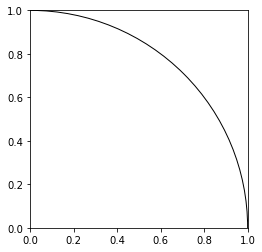

In [1]:
import matplotlib.pyplot as plt

circle1 = plt.Circle((0, 0), 1, facecolor= "none", ec='black')  #circle plot and assuming that the centre in the origin
fig, ax = plt.subplots()
plt.xlim(0,1)              # limiting x axis between 0 and 1
plt.ylim(0,1)              # limiting y axis between 0 and 1
ax.set_aspect(1)           #set the graph aspect as square
ax.add_artist(circle1)

Now I will start the estimation:

In [2]:
import numpy as np

pointsNumb = 100000                #number of random numbers
Circlepoints = 0                   #number of points that drop in the circle
Squarepoints = 0                   #number of points droped in the square
pointX = []                        #the x components of all random points
pointY = []                        #the y components of all random points
for i in range(pointsNumb):
    X = np.random.uniform(0,1)     #random x component for one random number    
    Y = np.random.uniform(0,1)     #random y component for one random number  
    CircleEq = (X**2) + (Y**2)     #circle equation
    if CircleEq <= 1:              #the total circle equation that will be smaller than the radius 
        Circlepoints += 1          #if the random point component satisfy the if loop so the point is droped in the circle
    Squarepoints += 1              #all the random points are droped in the square since the circle is inscribed in the square
    pointX.append(X)               #we append the x component of each random number in this array to plot the graph
    pointY.append(Y)               #we append the y component of each random number in this array to plot the graph
pi = 4*(Circlepoints/Squarepoints) #the equation represented in the description to calculate pi
print('Finally we can compute that pi = ', pi)

Finally we can compute that pi =  3.14056


Now I will plot the graph with the points

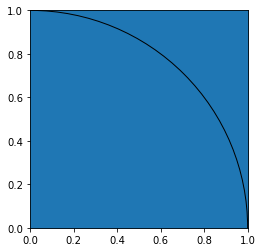

In [3]:
circle1 = plt.Circle((0, 0), 1, facecolor= "none", ec='black')  #circle plot and assuming that the centre in the origin
fig, ax = plt.subplots()
plt.xlim(0,1)                # limiting x axis between 0 and 1
plt.ylim(0,1)                # limiting y axis between 0 and 1
ax.set_aspect(1)             #set the graph aspect as square
ax.add_artist(circle1)
plt.scatter(pointX, pointY)  #plot each point that have x and y components

The graph above represents the points that are in blue, the quarter circle and the square

## Function Integration Using Monte Carlo 

This method is also based on random numbers and probability.

As we know that the integration of any function is in fact the area under the curve of this function. 

Now let's consider that we need to integrate a function in an interval [a,b] using the monte carlo method, so we take a random number x that is in this interval and we evaluate the function at this random number so we can have the area of a rectangle from height "function(x)" and width "b-a" as shown in the figure below:

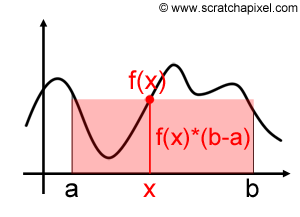

And then we continue by taking a different random numbers that are in the same interval so we have finally different rectangle areas with height determined from function of random numbers.

And then the integration is estimated by summing the areas obtained and averaging them by using a big number of random x.

What I said is summarized in the figure below:

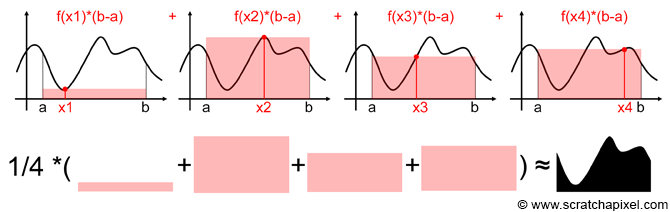

So Now I can have a general equation that represents the monte carlo integration:
\begin{equation}
    \int_a^b f(x)dx = \frac{b-a}{n}\sum_{i=0}^{n-1} f(x_r)
\end{equation}

In which we have $x_r$ is the random number used and n is the total amount of the random numbers

Now I will start by the code:

In [4]:
def monte_carlo_integration(func, a, b, nb: float = 100000):   #monte carlo single integration function
    """
    - func: represents the function that I need to integrate
    - a and b represents the interval of integration: [a,b]
    - nb: represents the number of random numbers
    """
    x_r = np.zeros(nb-1)         #x_r is the random number
    addition = 0                 #addition is the sum of the func(x_r) for all the random numbers
    int (nb-1)
    for i in range (int(nb-1)):
        x_r[i] = np.random.uniform(a,b)    #uniform random number in the interval between a and b
        addition += func(x_r[i])
    I_mc = (float((b-a)/nb)) * addition       #the integral calculated using monte carlo equation
    return I_mc
        

In [5]:
def f1(x):   #it is the function that we need to integrate using monte carlo
    return np.power(x,3) + 3*np.power(x,2) + 3
monte_carlo_integration(f1, 1, 3, nb=100000)

52.08160656310265

In the code below I will calculate that excat integral:

In [6]:
import scipy.integrate as integral
I_ex, errorr = integral.quad(f1,1,3) 
I_ex

52.00000000000001

In order to know the accuracy of monte carlo integration we need to compute the maximal error using the equation below:
\begin{equation}
\epsilon = \left| I_{mc}(nb) - I_{ex}\right| \
\end{equation}

In [7]:
numb = np.array([50, 100, 500, 1000, 5000, 10000]) #using different quatities of random numbers to compute the error convergence
errors = []                    #the array which will contain the errors caluclated using the equation in the description above
for i in range(len(numb)):
    I_mc = monte_carlo_integration(f1, 1, 3, numb[i]) #Monte carlo integration using the different quantities of random numbers
    error = np.abs(I_mc - I_ex)             #error calculation using the equation in the description above
    errors.append(error)  #we append the the error calculated for each quantity of random number in this array to plot the graph


The graph below represents the error convergence:

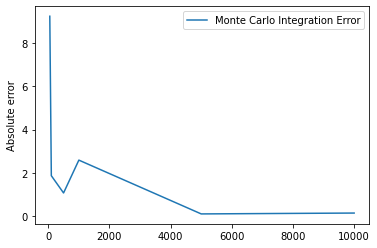

In [8]:
plt.plot(numb, errors, label="Monte Carlo Integration Error") #plotting the graph that will show the error convergence.
plt.ylabel('Amount of random numbers')
plt.ylabel('Absolute error')
plt.legend()
plt.show()

## Monte Carlo Double integration

The double integration using monte carlo is similar to the simple integration, but here we take the function that have two variables and we multiply it by the interval of each variable as represented below: 

\begin{equation}
    \int_{y_0}^{y_1}\int_{x_0}^{x_1} f(x,y)dxdy = \frac{(x_1-x_0)(y_1-y_0)}{n}\sum_{i=0}^{n-1} f(x_r,y_r)
\end{equation}
In which we have $x_r$ and $y_r$ are the random numbers used and n is the total amount of the random numbers

In [9]:
def MonteCarlo_double2(f, y0, y1, x0, x1, n):  #monte carlo double integration function
    """
    - f: represents the function that I need to integrate
    - x0 and x1 represents the interval of integration in x: [x0,x1]
    - y0 and y1 represents the interval of integration in y: [y0,y1]
    - n: represents the number of random numbers
    """
    xrr = np.zeros(n-1)                             #xrr is the random number for variable x
    yrr = np.zeros(n-1)                             #yrr is the random number for variable y
    addi = 0                                        #addi is the sum of the func(xrr, yrr) for all the random numbers
    for i in range(len(xrr)):
        xrr[i] = np.random.uniform(x0,x1)           #uniform random number for x variable in the interval between x0 and x1
        for j in range(len(yrr)):
            yrr[j] = np.random.uniform(y0,y1)       #uniform random number for y variable in the interval between y0 and y1
        addi += f(xrr[i], yrr[j])
    I_mc2 = (float(((x1-x0)*(y1-y0)) / n)) * addi   #the double integral calculated using monte carlo equation
    return I_mc2
            
            

In [10]:
def f2(x,y):   #it is the function that we need to integrate using monte carlo
    return np.power(x,6)*y +2*y +np.power(y,4)*np.power(x,6) +2*y +np.exp(x*y) +np.exp(x)
MonteCarlo_double2(f2, 0, 1, 0, 2, 1000)

27.09256343695096

In [11]:
I_exdouble, errorr = integral.dblquad(f2,0,1,0,2) 
I_exdouble

26.87292760947106

In order to know the accuracy of monte carlo double integration we need to compute the maximal error using the equation below:
\begin{equation}
\epsilon = \left| I_{mc}(nb) - I_{ex}\right| \
\end{equation}

In [14]:
numb2 = np.array([5, 50, 100, 200, 250])  #using different quatities of random numbers to compute the error convergence 
errors = []                  #the array which will contain the errors caluclated using the equation in the description above
for i in range(len(numb2)):
    I_mc2 = MonteCarlo_double2(f2, 0, 1, 0, 2, numb[i])#Monte carlo integration using the different quantities of random numbers
    error = np.abs(I_mc2 - I_exdouble)  #error calculation using the equation in the description above
    errors.append(error) #we append the the error calculated for each quantity of random number in this array to plot the graph

The graph below represents the error convergence:

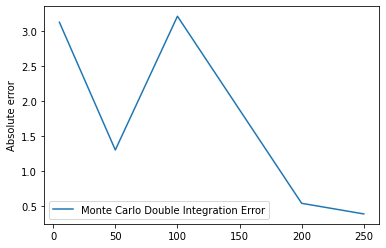

In [15]:
plt.plot(numb2, errors, label="Monte Carlo Double Integration Error") #plotting the graph that will show the error convergence.
plt.ylabel('Amount of random numbers')
plt.ylabel('Absolute error')
plt.legend()
plt.show()

## Monte Carlo Triple integration

The triple integration using monte carlo is similar to the simple integration, but here we take the function that have three variables and we multiply it by the interval of each variable as represented below: 

\begin{equation}
    \int_{z_0}^{z_1}\int_{y_0}^{y_1}\int_{x_0}^{x_1} f(x,y,z)dxdydz = \frac{(x_1-x_0)(y_1-y_0)(z_1-z_0)}{n}\sum_{i=0}^{n-1} f(x_r,y_r,z_r)
\end{equation}
In which we have $x_r$, $y_r$ and $z_r$ are the random numbers used and n is the total amount of the random numbers

In [16]:
def MonteCarlo_triple(f, z0, z1, y0, y1, x0, x1, n):  #monte carlo double integration function
    """
    - f: represents the function that I need to integrate
    - x0 and x1 represents the interval of integration in x: [x0,x1]
    - y0 and y1 represents the interval of integration in y: [y0,y1]
    - z0 and z1 represents the interval of integration in z: [z0,z1]
    - n: represents the number of random numbers
    """
    xr3 = np.zeros(n-1)                             #xr3 is the random number for variable x
    yr3 = np.zeros(n-1)                             #yr3 is the random number for variable y
    zr3 = np.zeros(n-1)                             #zr3 is the random number for variable z
    addi3 = 0                                       #addi3 is the sum of the func(xr3, yr3, zr3) for all the random numbers
    rr = []
    for i in range(len(xr3)):
        xr3[i] = np.random.uniform(x0,x1)           #uniform random number for x variable in the interval between x0 and x1
        for j in range(len(yr3)):
            yr3[j] = np.random.uniform(y0,y1)       #uniform random number for y variable in the interval between y0 and y1
            for k in range(len(zr3)):
                zr3[k] = np.random.uniform(z0,z1)   #uniform random number for z variable in the interval between z0 and z1
        addi3 += f(xr3[i], yr3[j], zr3[k])
    I_mc3 = (float(((x1-x0)*(y1-y0)*(z1-z0)) / n)) * addi3   #the triple integral calculated using monte carlo equation
    return I_mc3       

In [17]:
def f3(x,y,z):   #it is the function that we need to integrate using monte carlo
    return x*y +z*np.power(x,3)*np.power(y,2) + np.exp(x*y) +x*y*z + np.power(z,2)*np.power(x,4) +x*z
MonteCarlo_triple(f3, 0, 3, 1, 3, 0, 2, 200)

589.4629150905353

In [18]:
I_extriple, errorr = integral.tplquad(f3,0,3,1,3,0,2) 
I_extriple

589.0107464933076

## Monte Carlo Single Integration For N Dimensional Functions.

In the code below we need to input equation in order needed(N dimension):

In [19]:
value = input("enter an order(eg. if you need eq of order n you must add n+1 to add your last constant variable) : ")
order = int(value)
const = []
for i in range(order):
    x = input("enter your constant multiplied by variable from lowet(multiplied by x^0) to highest order(multiplied by x^n): ")
    x = float(x)
    const.append(x)   #appending all the constants multiplied by the variables from lower to higher order
orderadd = list(range(0,order)) #listing the order added from 0 until the input number

enter an order(eg. if you need eq of order n you must add n+1 to add your last constant variable) : 13
enter your constant multiplied by variable from lowet(multiplied by x^0) to highest order(multiplied by x^n): 2
enter your constant multiplied by variable from lowet(multiplied by x^0) to highest order(multiplied by x^n): 6.7
enter your constant multiplied by variable from lowet(multiplied by x^0) to highest order(multiplied by x^n): 3.2
enter your constant multiplied by variable from lowet(multiplied by x^0) to highest order(multiplied by x^n): 4
enter your constant multiplied by variable from lowet(multiplied by x^0) to highest order(multiplied by x^n): 6
enter your constant multiplied by variable from lowet(multiplied by x^0) to highest order(multiplied by x^n): 0
enter your constant multiplied by variable from lowet(multiplied by x^0) to highest order(multiplied by x^n): 4
enter your constant multiplied by variable from lowet(multiplied by x^0) to highest order(multiplied by x^n):

In [20]:
import sympy as sp
eq = 0
for i in range(order):
    i = int(i)
    r = sp.symbols('r')       #creating the equation making the symbol r as variable
    expr = const[i] * np.power(r,orderadd[i])   #multiplying each constant to its variable that have its own order
    eq += expr           #adding all expressions to have the final equation needed
display(eq)              #displaying the form of the equation
def eq13(u):             #the added function that we need to integrate using monte carlo
    return eq.subs(r,u)

7.0*r**12 + 5.0*r**11 + 3.0*r**10 + 1.0*r**9 + 9.0*r**8 + 2.0*r**7 + 4.0*r**6 + 6.0*r**4 + 4.0*r**3 + 3.2*r**2 + 6.7*r + 2.0

In [23]:
monte_carlo_integration(eq13 , 0, 2, nb = 1000)

7748.05481775381

In [22]:
import scipy.integrate as integral
I_exN, errorr = integral.quad(eq13,0,2)    #exact integral 
I_exN

7508.165234765236

## Heart Area Calculation using monte carlo simulation

In order to calculate the area of an heart using monte carlo method, we use the same method used in the first part where we estimated the π value. So we drop random numbers in the square in which the heart is inscribed and then there are points that are drop in the heart since it inscribed in the square. And then, the number of points that are in the heart represent its area.
Now the area of the square around the heart is expected to have the side as 36. So the $S_{area}$ = 36*36 =1296.
Then we use the equation below to calculate the area of the heart:
\begin{align}
\frac{A_{heart}}{A_{square}} &= \frac{Heart Pts}{Square Pts}  \\
\end{align}
So the final equation is:
\begin{align}
\ A_{heart} &= \frac{Heart Pts*1296}{Square Pts}  \\
\end{align}

I used the heart whose have these equations:
\begin{equation}
\ x = 16\sin^3(t) \
\end{equation}
\begin{equation}
\ y = 13\cos(t) - 5\cos(2t) -2\cos(3t) - \cos(4t)\
\end{equation}
with t = [0;2π]


The graph below represents the heart that we need to calculate its area:

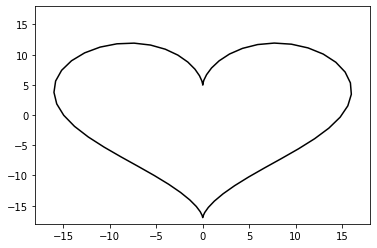

In [24]:
t = np.arange(0,2*np.pi, 0.1)                           #represents the t interval that is in the description above[0, 2*pi]
x = 16*np.sin(t)**3                                       #the x equation for the heart in function of t
y = 13*np.cos(t)-5*np.cos(2*t)-2*np.cos(3*t)-np.cos(4*t)  #the y equation for the heart in function of t
plt.plot(x,y, 'black')         #plotting the heart
plt.xlim(-18,18)               #limiting x axis between -18 and 18
plt.ylim(-18,18)               #limiting y axis between -18 and 18
Xmax = np.max(x)               #maximum x component obtained in the heart
Xmin = np.min(x)               #minimum x component obtained in the heart
Ymax = np.max(y)               #maximum y component obtained in the heart
Ymin = np.min(y)               #minimum y component obtained in the heart

Now I will represent the plot with points:

In [25]:
NumberofP = 10000                      #the number of random points
Heartpoints = 0                        #the number of random points dropped in the heart
sqpoints = 0                           #the number of random points dropped in the square and represents total random points
Xcomp = []                             #the x components of all random points
Ycomp = []                             #the y components of all random points
for i in range(NumberofP):
    xh = np.random.uniform(-18,18)     #random x component for one random number
    yh = np.random.uniform(-18,18)     #random y component for one random number
    if xh <= Xmax and xh>=Xmin:          
        if  yh <= Ymax and yh>=Ymin:   #the two ifs represent the points dropped in the heart using their components
            Heartpoints += 1           #if random point components satifies the ifs loop so the point is droped in the heart
    sqpoints += 1                      #all the random points are droped in the square
    Xcomp.append(xh)                   #we append the x component of each random number in this array to plot the graph
    Ycomp.append(yh)                   #we append the y component of each random number in this array to plot the graph
AreaHeart = 1296 *(Heartpoints/sqpoints) #the equation presented in the description above to calculate the heart area
print('finally the area of the heart =', AreaHeart)

finally the area of the heart = 925.2144


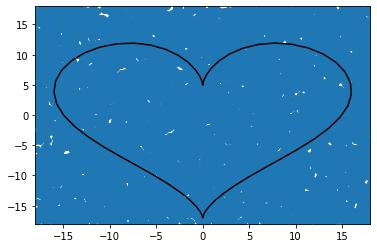

In [26]:
t = np.arange(0,2*np.pi, 0.1)                           #represents the t interval that is in the description above[0, 2*pi]
x = 16*np.sin(t)**3                                      #the x equation for the heart in function of t
y = 13*np.cos(t)-5*np.cos(2*t)-2*np.cos(3*t)-np.cos(4*t) #the y equation for the heart in function of t
plt.plot(x,y, 'black')           #plotting the heart
plt.xlim(-18,18)                 #limiting x axis between -18 and 18      
plt.ylim(-18,18)                 #limiting y axis between -18 and 18
plt.scatter(Xcomp, Ycomp)        #plot each point that have x and y components